In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_excel("Heart_Disease_Dataset.xlsx", sheet_name="heart_Disease_clinical_records_")

# Select clinical features
clinical_features = data[["platelets", "serum_creatinine", "serum_sodium", 
                          "creatinine_phosphokinase", "ejection_fraction"]]

# Compute correlation matrix
corr_matrix = clinical_features.corr()

# Reshape for Power BI
corr_df = corr_matrix.reset_index().melt(id_vars="index", var_name="Feature_2", value_name="Correlation")
corr_df.rename(columns={"index": "Feature_1"}, inplace=True)

# Save to CSV for Power BI
corr_df.to_csv("correlation_matrix.csv", index=False)

In [3]:
corr_matrix

,platelets,serum_creatinine,serum_sodium,creatinine_phosphokinase,ejection_fraction
platelets,1.000000,-0.041198,0.062125,0.024463,0.072177
serum_creatinine,-0.041198,1.000000,-0.189095,-0.016408,-0.011302
serum_sodium,0.062125,-0.189095,1.000000,0.059550,0.175902
creatinine_phosphokinase,0.024463,-0.016408,0.059550,1.000000,-0.044080
ejection_fraction,0.072177,-0.011302,0.175902,-0.044080,1.000000


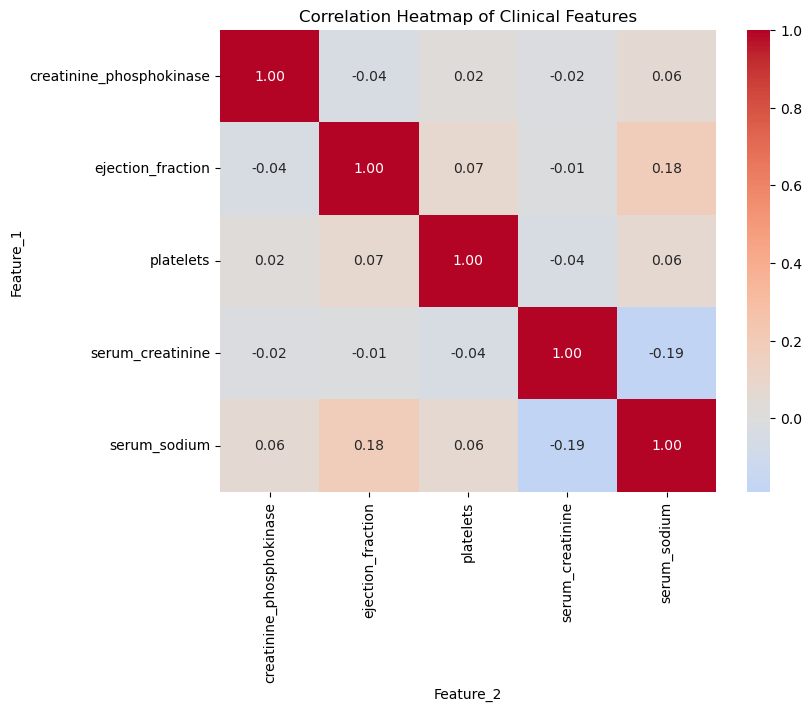

In [4]:
# Pivot corr_df to matrix form for heatmap
corr_pivot = corr_df.pivot(index="Feature_1", columns="Feature_2", values="Correlation")

plt.figure(figsize=(8,6))
sns.heatmap(corr_pivot, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Clinical Features")
plt.show()
